In [1]:
import pandas as pd
df = pd.read_csv('ks-projects-201801.csv')

In [2]:
df.shape

(378661, 15)

### Data Cleansing

Removing nulls, checking types, checking row uniqueness, checking data values, getting timeframe differrence, checking if some data is invalid(I dont' see a rule in this last point)

In [3]:
df.dropna(inplace=True)
df.shape

(374860, 15)

In [4]:
df.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

###### the numbered data are really numbers, no need to convert any type

In [5]:
df['state'].value_counts()

failed        197611
successful    133851
canceled       38757
live            2798
suspended       1843
Name: state, dtype: int64

###### Above seems we will need to keep only the "failed" and "succesfful" states. But first let us get rid of some of unseful columns

In [6]:
df.drop(['ID','category','currency'],axis=1,inplace=True)

###### generating the timeframe columns then get rid of the deadline and launched columns

In [7]:
from datetime import datetime
def days_between(dd1, dd2):
    ddres=[]
    for d1,d2 in zip(dd1,dd2):
        d1 = datetime.strptime(d1, "%Y-%m-%d")
        d2 = datetime.strptime(d2, "%Y-%m-%d %H:%M:%S")
        ddres.append(abs((d2 - d1).days))
    return ddres

df['timeframe']=days_between(df['deadline'],df['launched'])

In [8]:
df.drop(['deadline','launched'],axis=1, inplace=True)
df.head()

,name,main_category,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,timeframe
0,The Songs of Adelaide & Abullah,Publishing,1000.0,0.0,failed,0,GB,0.0,0.0,1533.95,59
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,30000.0,2421.0,failed,15,US,100.0,2421.0,30000.00,60
2,Where is Hank?,Film & Video,45000.0,220.0,failed,3,US,220.0,220.0,45000.00,45
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,5000.0,1.0,failed,1,US,1.0,1.0,5000.00,30
4,Community Film Project: The Art of Neighborhoo...,Film & Video,19500.0,1283.0,canceled,14,US,1283.0,1283.0,19500.00,56


In [9]:
df=df[df.state.isin(['failed','successful'])]

In [10]:
df.shape

(331462, 11)

In [11]:
df

,name,main_category,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,timeframe
0,The Songs of Adelaide & Abullah,Publishing,1000.0,0.0,failed,0,GB,0.0,0.0,1533.95,59
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,30000.0,2421.0,failed,15,US,100.0,2421.0,30000.00,60
2,Where is Hank?,Film & Video,45000.0,220.0,failed,3,US,220.0,220.0,45000.00,45
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,5000.0,1.0,failed,1,US,1.0,1.0,5000.00,30
5,Monarch Espresso Bar,Food,50000.0,52375.0,successful,224,US,52375.0,52375.0,50000.00,35
...,...,...,...,...,...,...,...,...,...,...,...
378654,"Homemade fresh dog food, Cleveland OH",Food,6500.0,154.0,failed,4,US,0.0,154.0,6500.00,30
378657,The Tribe,Film & Video,1500.0,155.0,failed,5,US,155.0,155.0,1500.00,27
378658,Walls of Remedy- New lesbian Romantic Comedy f...,Film & Video,15000.0,20.0,failed,1,US,20.0,20.0,15000.00,46
378659,BioDefense Education Kit,Technology,15000.0,200.0,failed,6,US,200.0,200.0,15000.00,31


chaning state column to 0 or 1

In [12]:
df.loc[df['state']=='failed','result']=0
df.loc[df['state']=='successful','result']=1

In [13]:
df.drop(['country','name','state'],axis=1,inplace=True)
df.drop_duplicates(inplace=True)

In [14]:
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')
#ax.boxplot(df['backers'])
#ax.hist(df['goal'].T)
#plt.show()
df[['backers','goal','timeframe']].hist(bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D123096F88>,
      dtype=object)

Above shows that timeframe has a normal distribution, while others are very centric

In [15]:
features=df.drop('result',axis=1)
labels=df['result']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)

# Centring data 
   

In [17]:
# hot encoding and keepying the lb_style for prediction
from sklearn.preprocessing import LabelBinarizer
lb_style = LabelBinarizer()
lb_style.fit(X_train["main_category"],)
x_train=lb_style.transform(X_train['main_category'])
x_test=lb_style.transform(X_test['main_category'])
#dfd=df.join(pd.DataFrame(lb_results, columns=lb_style.classes_, index = df.index))
#df = dfd.drop('main_category',axis=1)

In [18]:
X_train=X_train.drop('main_category',axis=1).join(pd.DataFrame(x_train,columns=lb_style.classes_,index=X_train.index))
X_test=X_test.drop('main_category',axis=1).join(pd.DataFrame(x_test,columns=lb_style.classes_,index=X_test.index))
X_train
X_test

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,timeframe,Art,Comics,Crafts,...,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
124323,500.0,50.00,2,50.00,50.00,500.00,14,0,0,0,...,0,0,0,0,0,0,1,0,0,0
330593,6000.0,65.00,4,65.00,65.00,6000.00,60,0,1,0,...,0,0,0,0,0,0,0,0,0,0
52006,500.0,10.00,2,10.00,10.00,500.00,15,0,0,0,...,0,0,0,0,0,0,1,0,0,0
238413,2000.0,2055.77,49,2055.77,2055.77,2000.00,47,0,0,0,...,0,0,0,0,0,1,0,0,0,0
308207,5000.0,7016.00,54,7016.00,7016.00,5000.00,30,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288107,100000.0,145650.00,58,17334.25,18665.66,12815.42,30,0,0,0,...,0,0,0,0,0,0,0,0,0,0
215153,500.0,250.00,1,250.00,250.00,500.00,60,0,0,0,...,0,1,0,0,0,0,0,0,0,0
314475,13000.0,16034.00,315,16034.00,16034.00,13000.00,33,0,0,0,...,0,0,0,0,0,1,0,0,0,0
318464,750.0,782.00,24,0.00,597.91,573.44,36,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Normalization of all

In [19]:
from sklearn import preprocessing
# Get column names first
names = X_train.columns
# Create the Scaler object
scaler = preprocessing.MinMaxScaler()
# Fit your data on the scaler object
scaler.fit(X_train)
train=scaler.transform(X_train)
test=scaler.transform(X_test)
X_train= pd.DataFrame(train, columns=names)
X_test= pd.DataFrame(test, columns=names)
X_test.head()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,timeframe,Art,Comics,Crafts,...,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
0,0.000005,2.458333e-06,0.000009,2.458333e-06,2.458333e-06,0.000003,0.142857,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.000060,3.195833e-06,0.000018,3.195833e-06,3.195833e-06,0.000036,0.648352,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000005,4.916666e-07,0.000009,4.916666e-07,4.916666e-07,0.000003,0.153846,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.000020,1.010753e-04,0.000223,1.010753e-04,1.010753e-04,0.000012,0.505495,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.000050,3.449533e-04,0.000246,3.449533e-04,3.449533e-04,0.000030,0.318681,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
X_test.shape[0]+X_train.shape[0]

305346

# finding if lot of columns are correlated

In [21]:
X_train.corr()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,timeframe,Art,Comics,Crafts,...,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
goal,1.000000,0.007644,0.004379,0.005715,0.005245,0.967005,0.021236,0.000512,-0.003314,-0.004835,...,-0.004015,0.013629,-0.000506,-0.000499,0.004787,-0.010369,-0.005226,-0.007154,0.016360,-0.003704
pledged,0.007644,1.000000,0.706915,0.855875,0.949571,0.005035,0.007080,-0.019816,-0.007201,-0.013273,...,-0.007859,-0.015306,-0.011753,0.044062,-0.007521,-0.025310,-0.011971,-0.021699,0.045935,-0.012440
backers,0.004379,0.706915,1.000000,0.725912,0.744618,0.004740,-0.001203,-0.021862,0.003197,-0.013979,...,-0.012273,-0.019278,-0.015363,0.081869,-0.008471,-0.024754,-0.014111,-0.018246,0.024978,-0.014002
usd pledged,0.005715,0.855875,0.725912,1.000000,0.910308,0.006107,0.006776,-0.017699,-0.005540,-0.012204,...,-0.008410,-0.008055,-0.009142,0.040750,-0.007131,-0.020399,-0.010546,-0.019561,0.037493,-0.009719
usd_pledged_real,0.005245,0.949571,0.744618,0.910308,1.000000,0.005507,0.007317,-0.019980,-0.006767,-0.013332,...,-0.008837,-0.014092,-0.011346,0.045846,-0.008173,-0.024606,-0.011633,-0.021711,0.045850,-0.011915
usd_goal_real,0.967005,0.005035,0.004740,0.006107,0.005507,1.000000,0.020138,0.000747,-0.002963,-0.004629,...,-0.004107,0.014134,0.000812,-0.000510,0.004742,-0.009709,-0.004934,-0.006669,0.012676,-0.003291
timeframe,0.021236,0.007080,-0.001203,0.006776,0.007317,0.020138,1.000000,-0.035991,0.001600,-0.030220,...,-0.025547,0.032763,0.000225,-0.045258,0.002710,0.043113,-0.002661,-0.004647,0.033668,-0.011058
Art,0.000512,-0.019816,-0.021862,-0.017699,-0.019980,0.000747,-0.035991,1.000000,-0.052726,-0.044779,...,-0.071722,-0.130894,-0.076475,-0.091975,-0.032391,-0.115135,-0.050756,-0.097825,-0.086010,-0.053424
Comics,-0.003314,-0.007201,0.003197,-0.005540,-0.006767,-0.002963,0.001600,-0.052726,1.000000,-0.027953,...,-0.044772,-0.081709,-0.047739,-0.057414,-0.020220,-0.071872,-0.031684,-0.061067,-0.053691,-0.033349
Crafts,-0.004835,-0.013273,-0.013979,-0.012204,-0.013332,-0.004629,-0.030220,-0.044779,-0.027953,1.000000,...,-0.038023,-0.069393,-0.040543,-0.048760,-0.017172,-0.061039,-0.026908,-0.051862,-0.045598,-0.028323


..

In [22]:
X_train.median()

goal                0.000050
pledged             0.000053
backers             0.000087
usd pledged         0.000034
usd_pledged_real    0.000053
usd_goal_real       0.000030
timeframe           0.318681
Art                 0.000000
Comics              0.000000
Crafts              0.000000
Dance               0.000000
Design              0.000000
Fashion             0.000000
Film & Video        0.000000
Food                0.000000
Games               0.000000
Journalism          0.000000
Music               0.000000
Photography         0.000000
Publishing          0.000000
Technology          0.000000
Theater             0.000000
dtype: float64

In [23]:
import matplotlib.pyplot as plt

(array([  4128.,  10971.,  22542., 116893.,  22759.,   5410.,  19451.,
           464.,    319.,   1644.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

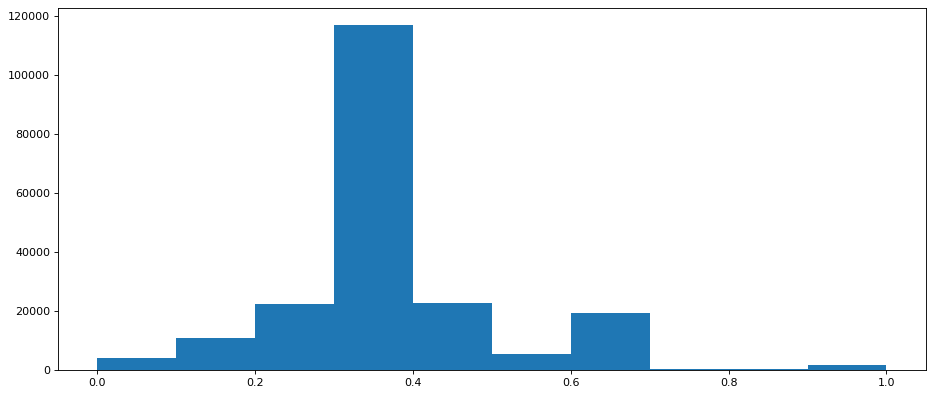

In [24]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
#ax.boxplot(df['backers'])
ax.hist(X_train['timeframe'])

In [25]:
str(X_train.shape) + str(X_test.shape)

'(204581, 22)(100765, 22)'

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=len(X_train.columns)-2)
pca.fit(X_train)
train=pca.transform(X_train)
test=pca.transform(X_test)
X_train= pd.DataFrame(data = train)
X_test = pd.DataFrame(data = test)

In [27]:
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.076407,-0.097906,-0.049175,-0.039967,-0.003398,0.022136,0.069605,0.066933,0.424792,0.104629,0.887511,-0.145246,-0.227656,-0.053639,-0.019073,0.000320,-0.000284,-0.000071,-0.000017,0.000005
1,-0.074150,-0.087112,-0.044271,-0.051757,-0.009039,0.008146,0.072704,0.062127,0.573475,0.717199,-0.382491,-0.155122,0.266833,-0.051122,-0.009066,-0.000814,-0.000904,-0.000291,-0.000044,-0.000007
2,-0.076329,-0.097623,-0.049034,-0.040184,-0.003514,0.021816,0.069577,0.066718,0.424677,0.104804,0.887469,-0.146608,-0.216770,-0.053732,-0.018892,0.000297,-0.000291,-0.000068,-0.000016,0.000005
3,-0.439134,0.789129,0.085000,0.051691,0.004259,-0.016781,-0.039116,-0.026832,-0.038018,-0.000834,-0.006223,-0.023798,0.123473,-0.008483,-0.000142,-0.000424,-0.000256,0.000047,-0.000004,-0.000005
4,0.844965,0.196694,0.043900,0.033062,0.004019,-0.006838,-0.025986,-0.015987,-0.026875,-0.003012,-0.004157,0.000422,-0.054991,-0.005374,-0.002663,-0.000810,-0.000073,-0.000107,-0.000047,0.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100760,-0.126175,-0.203939,-0.192311,-0.407426,0.727019,-0.303108,-0.193402,-0.084314,-0.082289,-0.006649,-0.011655,-0.010395,-0.047942,-0.012914,-0.004744,0.000485,0.002409,-0.002785,0.003105,0.000258
100761,0.847316,0.205189,0.048125,0.026569,0.000527,-0.016416,-0.026804,-0.022431,-0.030305,0.002239,-0.005437,-0.040460,0.271579,-0.008175,0.002788,-0.001542,-0.000824,-0.000032,0.000015,-0.000009
100762,-0.440231,0.785164,0.083026,0.054721,0.005890,-0.012314,-0.038736,-0.023826,-0.036419,-0.003284,-0.005626,-0.004720,-0.028926,-0.007176,-0.002686,0.000029,0.001395,0.000614,-0.000039,0.000006
100763,-0.120289,-0.187849,-0.158835,-0.259901,-0.090612,0.836722,-0.261001,-0.103431,-0.090658,-0.005522,-0.012906,-0.023135,0.043057,-0.014395,-0.003484,-0.000650,-0.000312,0.000015,0.000015,-0.000006


C:\Users\Moata\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  This is separate from the ipykernel package so we can avoid doing imports until


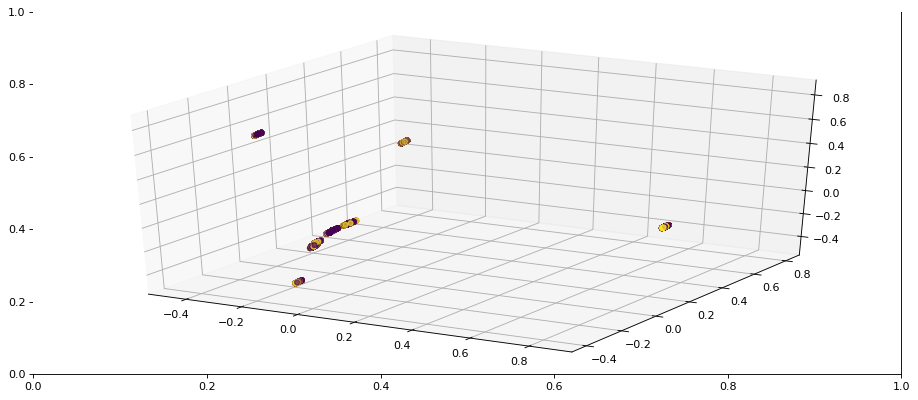

In [28]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(num=None, figsize=(14,6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')
ax.scatter(X_train[0],X_train[1],X_train[2],c=y_train)

C:\Users\Moata\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  This is separate from the ipykernel package so we can avoid doing imports until


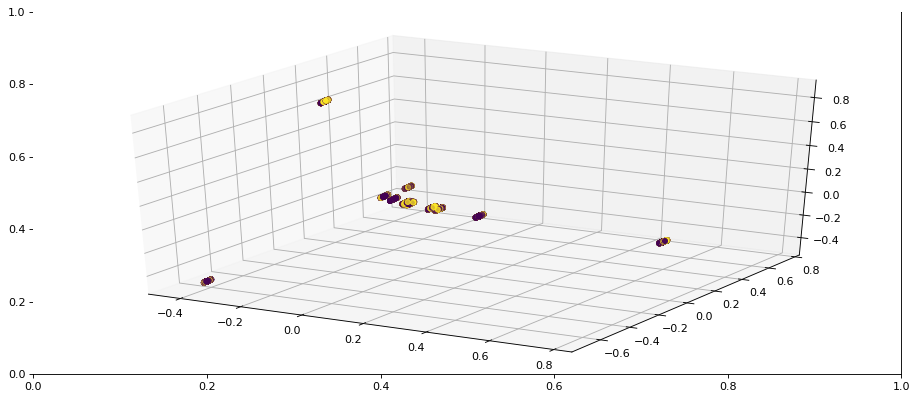

In [29]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(num=None, figsize=(14,6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')
ax.scatter(X_train[3],X_train[4],X_train[5],c=y_train)

C:\Users\Moata\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  This is separate from the ipykernel package so we can avoid doing imports until


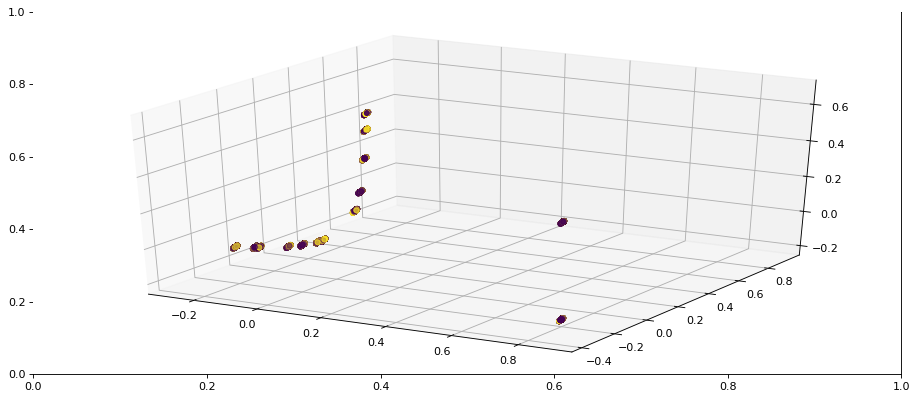

In [30]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(num=None, figsize=(14,6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')
ax.scatter(X_train[6],X_train[7],X_train[8],c=y_train)

C:\Users\Moata\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  This is separate from the ipykernel package so we can avoid doing imports until


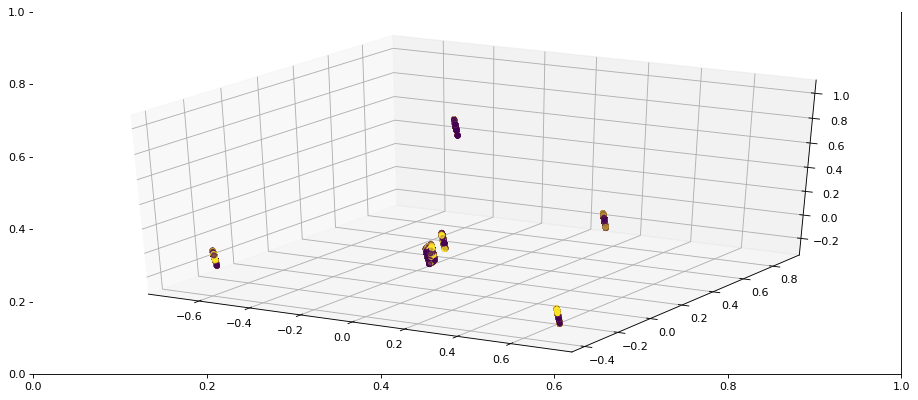

In [31]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(num=None, figsize=(14,6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')
ax.scatter(X_train[9],X_train[10],X_train[11],c=y_train)

C:\Users\Moata\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  This is separate from the ipykernel package so we can avoid doing imports until


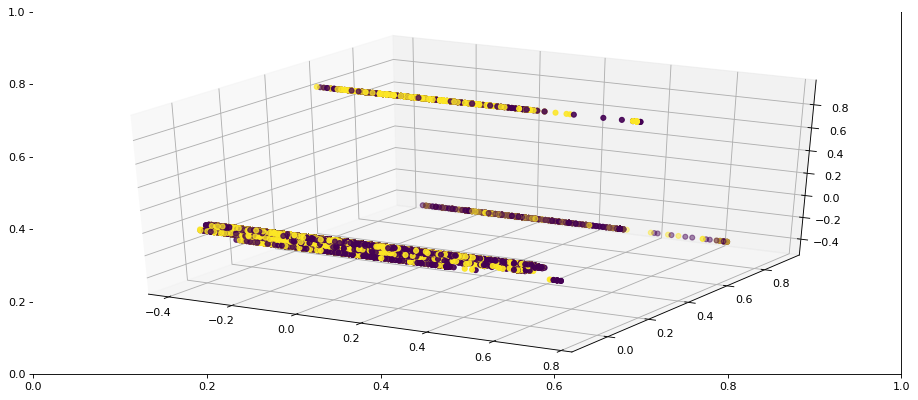

In [32]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(num=None, figsize=(14,6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')
ax.scatter(X_train[12],X_train[13],X_train[14],c=y_train)

C:\Users\Moata\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  This is separate from the ipykernel package so we can avoid doing imports until


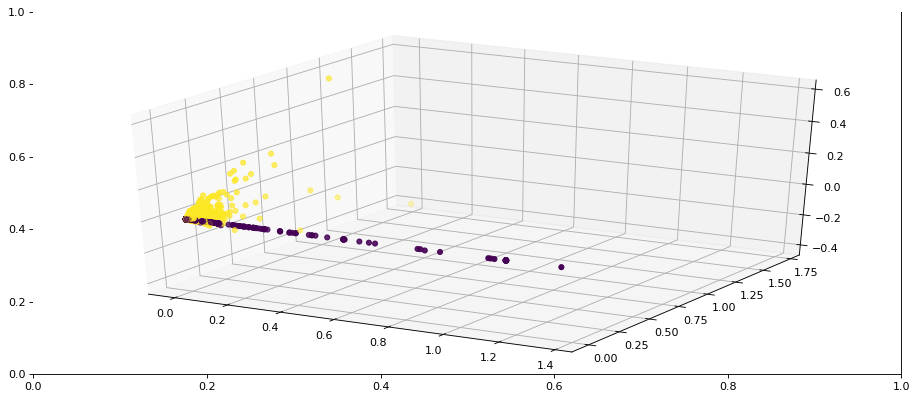

In [33]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(num=None, figsize=(14,6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')
ax.scatter(X_train[15],X_train[16],X_train[17],c=y_train)

C:\Users\Moata\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  This is separate from the ipykernel package so we can avoid doing imports until


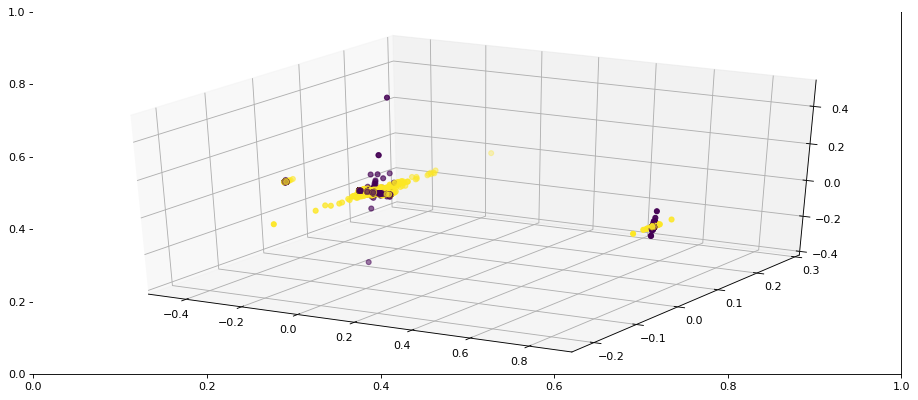

In [34]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(num=None, figsize=(14,6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')
ax.scatter(X_train[0],X_train[18],X_train[19],c=y_train)

From above scatters we can see that we can train data as we see mostly separation between failed an succeeded proejcts

# Training with Logistics regression

In [35]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)
trainscore=clf.score(X_train,y_train)
testscore=clf.score(X_test,y_test)
print('training score: ',trainscore,'  , test score: ',testscore)

C:\Users\Moata\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


training score:  0.6498990619852284   , test score:  0.6539770753733936
